<font color='purple'> <h1 align="center">Importing Libraries and Dataset</h1> </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [4]:
data.shape

(50, 7)

In [5]:
data.isnull().sum()

Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

<font color='green'> <h1 align="center">Descriptive Statistics</h1> </font>

<font color='blue'> <h2 align="center">Measure Of Central Tendency</h2> </font>

# <font color='brown'><u>Mean</u></font>

## The mean is the average of the sum of all observatios in the data set divided by the number of observations.

<h2 align="center"><i> <b>Mean = Sum of all Observations / No Of Observations</b></i></h2>

## Consider the Following data points 17, 16, 21, 18, 15, 17, 21, 19, 11, 23

<h3 align="center"> $$ Mean = \frac{17+16+21+18+15+17+21+19+11+23}{2}=\frac{178}{2}=17.8 $$ </h3>

## Mean can be used for both discrete and continuous data, although it is often used with continuous data.It is a number around which the entire data set is spread out.

In [6]:
def mean(summation,number_of_elements):
    return summation/number_of_elements

In [7]:
sum_data=sum(data['Annual_HH_Income'])
no_of_observations=len(data['Annual_HH_Income'])
mean(sum_data,no_of_observations)

490019.04

In [8]:
np.mean(data['Annual_HH_Income'])

490019.04

# <font color='brown'><u>Effect of Mean due to Skewness</u></font>

### It gets affected by any outliers present in the data. It has the time complexity of log(n).

___________________________________________________________________________________________________________________

# <font color='brown'><u>Median</u></font>

## The median is the middle score for a set of data that has been arranged in order of magnitude.

# <font color='brown'><u><h4> To Calculate Median</h4></u> </font>

## Arrange the values in ascending order and
<h2><li>If the number of observations leads to an odd value the (n/2)th element is considerd as median.</li><li>If even the average of (n/2)<sup>th</sup>  and (n/2 + 1)<sup>th</sup> element is considered as the median.</li></h2>

## If Number of Observations is Odd : <br>$$ Median = \frac{\frac{n}{2}^{th} obs + (\frac{n}{2}^{th}+1)\ obs}{2} $$

## If Number of Observations is Even : <br>$$ Median = \frac{n}{2}^{th} obs $$

## As Number of Observations is odd the dataset is arranged in ascending order

<h1 align="center">11, 15, 16, 17, 17, 18, 19, 21,21, 23</h1>

# $$ Median = \frac{5^{th} obs + 6^{th} obs}{2}=\frac{17+18}{2}=17.5 $$

In [9]:
def my_median(data):
    n=sorted(data)
    no_obs=len(n)
    if(no_obs%2!=0):
        odd_n_term=int((no_obs+1)/2)
        median_data=n[odd_n_term]
        
    else:
        n_term=int(no_obs/2)
        n1_term=int((no_obs/2))-1
        median_data=(n[n_term]+n[n1_term])/2
 
    return median_data

In [10]:
my_median(data['Annual_HH_Income'])

447420.0

In [11]:
np.median(data['Annual_HH_Income'])

447420.0

# <font color='brown'><u>Effect of Median due to Skewness</u></font>

### <b> The median is less affected by outliers and</b>. It is robust and has higher complexity of o(n log n).

___________________________________________________________________________________________________________________

# <font color='brown'><u>Mode</u></font>

## Mode - Mode is the number which has the maximum frequency in the entire data set, or in other words,mode is the number that appears the maximum number of times. A data can have one or more than one mode.

### <li> <p>If a single Number apperars most number of times it is called as <b>Uni-Modal.</b></p></li>
### <li> <p>If Two Numbers apperars maximum number of times it is called as <b>Uni-Modal.</b></p></li>
### <li> <p>If there are more than two numbers that appear maximum number of times, the data has more than two modes, and is called as <b>Multi-Modal</b></p></li>

<h2>Here, 17 and 21 both occur twice. Hence, this is a Bimodal data and the modes are 17 and 21.</h2>

In [12]:
def mode(data):
    n=0
    dic={}
    for i in sorted(data):
        dic.setdefault(i,0)
        dic[i]+=1
    for i,j in dic.items():
        if j==max(dic.values()):
            freq_val=i
    return freq_val

In [13]:
mode(data['No_of_Earning_Members'])

1

In [14]:
stats.mode(data['No_of_Earning_Members'])

ModeResult(mode=array([1]), count=array([33]))

In [15]:
mode(data['No_of_Fly_Members'])

4

In [16]:
stats.mode(data['No_of_Fly_Members'])

ModeResult(mode=array([4]), count=array([15]))

## <font color='brown'><u>Effect of Mode due to Skewness</u></font>

## The mode does not get impacted by the outliers.

___________________________________________________________________________________________________________________

## <font color='blue'> <h2 align="center">The Measure of Spread</h2> </font>

# <font color='brown'><u>Variance</u></font>

## Variance - The Variance is defined as the The average of the squared differences from the Mean. It determines the spread of data around the mean

## Variance is denoted by the Symbol σ^2

# <font color='brown'><u> How To Calculate Variance</u></font>

## 1.Find the mean of the dataset<br><p>2.Then Subtract the mean from each element in the data set and then squaring the result.The results are squared to make negative values positive.</p> <br>3.Averaging the squared differences.<br> 

# $$ \sigma^2 = \frac{\sum_{i=1}^{n}\,(xi-\mu)^2}{N} $$


In [17]:
def variance(data):
    length=len(data)
    sum_data=sum(data)
    mean=sum_data/length
    sum_var=0
    for i in data:
        sum_sq=(i-mean)**2
        sum_var+=sum_sq
    return sum_var/length

In [18]:
variance(data["Annual_HH_Income"])

100437186889.95831

In [19]:
np.var(data['Annual_HH_Income'])

100437186889.95831

___________________________________________________________________________________________________________________

# <font color='brown'><u>Standard Deviation</u></font>

### The square root of the variance is the Standard Deviation.It is denoted by the symbol "σ ".

# $$ \sigma = \sqrt{\frac{1}{N}{\sum_{i=1}^{n}\,(xi-\mu)^2}} $$

In [20]:
def standard_deviation(data):
    length=len(data)
    sum_data=sum(data)
    mean=sum_data/length
    sum_var=0
    for i in data:
        sum_square=(i-mean)**2
        sum_var+=sum_square
    return (sum_var/length)**0.5

In [21]:
standard_deviation(data["Annual_HH_Income"])

316918.26531451027

In [22]:
np.std(data['Annual_HH_Income'])

316918.26531451027

### Both Variance and Standard Deviation gets effected by the mean

# <font color='brown'><u>Covarience</u></font>

## Covarience is the statistical measurement to find the relationship of the variance between the two variables.

<h2>If x value increases and y increases then covariance is positive.<br>If x value increases and y decreases then covariance is negative.</h2>

## $$ cov(x,y)=\frac{\Sigma (x_i-\bar{x})(y_i-\bar{y})}{N} $$

In [23]:
np.cov(data['Mthly_HH_Expense'],data['Annual_HH_Income'])[0,1]

2288329903.3469396

# <font color='brown'><u>Coorelation</u></font>

## Coorelation estimates the extent to which two variables are linearly related, It signifies the strength of x and y variables.

## The correlation coefficient which ranges from -1 to +1 and is denoted by r.

## <ol><li>Positive r values indicate a positive correlation where the values of both variables tend to increase together. </li><li>Negative r values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.</li></ol>

# $$ \mathrm{r_{xy}}=\frac{\Sigma(xi-\bar{x})(yi-\bar{y})}{\sqrt{\sum(xi-\bar{x})^2{\sum(yi-\bar{y})^2}}} $$

# $$Correlation = \frac{Covarience\ of\ X\ and\ Y}{Standard\ Deviation\ of\ X\ * Standard\ Deviation\ of\ X}$$

In [24]:
def correlation(column_x,column_y):
    cov=np.cov(data['Mthly_HH_Expense'],data['Annual_HH_Income'])[0,1]
    std_x=standard_deviation(column_x)
    std_y=standard_deviation(column_y)
    return (cov/(std_x*std_y))

In [25]:
correlation(data['Mthly_HH_Expense'],data['Annual_HH_Income'])

0.603287377088574

In [26]:
np.corrcoef(data['Mthly_HH_Expense'],data['Annual_HH_Income'])[0,1]

0.5912216295468026

___________________________________________________________________________________________________________________

# <font color='brown'><u> Normal Distribution</u></font>

## In a symmetrical distribution, the mean, median, and mode are all equal. In these cases, the mean is often the preferred measure of central tendency.

### $$ H \backsim N(\mu , \sigma)$$

<h2> <p>H = Height of Random Variable<br></p>
<p>N=Normal Distributon<br></p>
<p>μ= Mean<br></p>
<p>σ= Standard Deviation</h2>

___________________________________________________________________________________________________________________

![](nomral.png)

# <font color='brown'><u> Features of Normal Distribution</u></font>

<h2><ol>
<li>It should look like a bell shape curve</li><br>
<li>Mean = Median = Mode </li><br>
<li>It should look symmetrical</li><br>
<li>68 - 95 - 99.7 % rule </li><br>
</ol></h2>

# <font color='brown'><u>Properties of Normal Distribuion</u></font>

<h2><ol>
<li>The area Under the curve is equal to 1.</li><br>
<li>The sum of all the probabilites of event is equal to 1.</li><br>
</ol></h2>

![](normalrule.jpg)

___________________________________________________________________________________________________________________

# <font color='brown'><u> Skewness</u></font>

## Skewness is the measure of the degree of asymmetry of a Normal distribution.

___________________________________________________________________________________________________________________

# <font color='brown'><u> Positively Skewed Normal Distribution</u></font>


## If there are more outliers towards the right to a normal distributions and leads to a tile on the right side such distribution is calle as a Positively Skewed Normal Distribution

<h1 align='center'>Mean  >  Median  >  Mode </h1>

___________________________________________________________________________________________________________________

# <font color='brown'><u> Negativley Skewed Normal Distribution</u></font>

## If there are more outliers towards the left side of the normal distributions and leads to a tile on the left side such distribution is calle as a Negetivley Skewed Normal Distribution.

<h1 align='center'>Mode  >  Median  >  Mean </h1>

![](skew.png)

___________________________________________________________________________________________________________________

# <font color='brown'><u> QQ Plot</u></font>

# A QQ Plot is a plot of the quantiles of two distributions against each other or a plot based on estimates of the quantiles.

<img src= qqplot.gif width="300" height="300">

___________________________________________________________________________________________________________________

# <font color='brown'><u> Implemtation</u></font>

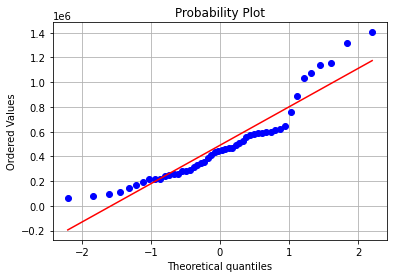

In [27]:
stats.probplot(data['Annual_HH_Income'], dist="norm", plot=plt)
plt.grid()

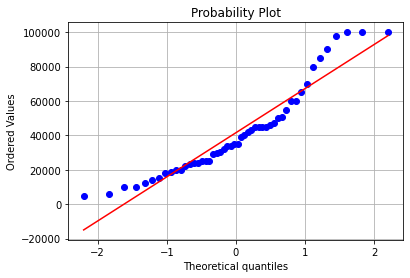

In [28]:
stats.probplot(data['Mthly_HH_Income'], dist="norm", plot=plt)
plt.grid()

___________________________________________________________________________________________________________________

# <font color='brown'><u> Box Cox Plot</u></font>

## The Box-Cox Nomrality plot is a plot of these correlation coefficients for various values of the lambda parameter

## It is Used to Convert any Log Normal or Parito Distribution into a Normal Distribution

___________________________________________________________________________________________________________________

<font color='coral'> <h1 align="center"> Distributions</h1> </font>

# <font color='brown'><u>Uniform Distribution</u></font>

## It refers to a type of Continous Probability Distribution in which all outcomes are equally likely.

## It generally can be visualized as a straight horizontal line.

# $$P_x = \frac{1}{n} $$

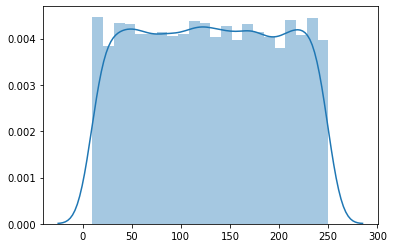

In [29]:
uniform_10000=np.random.uniform(low=10,high=250,size=10000)
sns.distplot(uniform_10000)

# <font color='brown'><u>Log Normal Distribution</u></font>

## It generally looks as a normal distribution with very long tail because of the outliers.

![](lognormal.png)

### For Example - car sales price, the bulding cost in a locality

___________________________________________________________________________________________________________________

# <font color='brown'><u>Parito Distribution</u></font>

### The Pareto distribution is a skewed, heavy-tailed distribution or slowlying decaying tails, that is sometimes used to model the distribution of incomes and other financial variables.

### Mostly Pareto Distribution is Populor in description of social, quality control, scientific, geophysical, actuarial, and many other types of observable phenomena. 

### Originally applied to describing the distribution of wealth in a society, fitting the trend that a large portion of wealth is held by a small fraction of the population

![](Pareto.png)

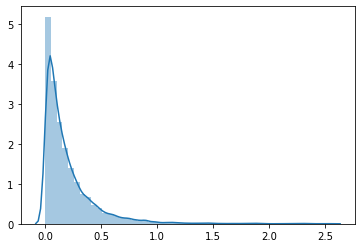

In [30]:
pareto_rv=np.random.pareto(a=6,size=7000)
sns.distplot(pareto_rv)

___________________________________________________________________________________________________________________